In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

def latex_table(df):
    latex_table = df.to_latex(
        index=False,
        escape=False,
        column_format='ll',  # Define column alignment
        caption='CAPTION CAPTION',
        label='table:LABEL_LABEL'
    )

    latex_table = latex_table.replace("\\begin{table}", "\\begin{table}[H]\n\\centering")

    latex_table = latex_table.replace("\\toprule", "\\toprule\n%METER COL NAMES A NEGRITO")

    print(latex_table)

colors_scatter = ["#ff7f0e", "green", "#1f77b4", "red"]
colors_plot = ["#ffbb78", "lightgreen", "#aec7e8", "#FFB6B6"]

---
---
---

In [23]:
exact_results = pd.read_excel("results/exact_counts.xlsx", index_col=0, header=[0,1])
exact_results.iloc[:7]

EN                IT                 FI      
        word  count       word  count        word count
0  pinocchio  457.0  pinocchio  460.0   pinocchio   443
1        say  282.0         il  386.0       sanoa   258
2     little  238.0       dire  282.0       saada   143
3     puppet  209.0         si  251.0       alkaa   134
4       come  141.0  burattino  225.0       tehdä   134
5        boy  140.0     volere  167.0  marionetti   131
6       like  133.0     vedere  152.0       poika    81

In [24]:
top7_exact = exact_results.iloc[:10]
top7_exact[("EN", "count")] = top7_exact[("EN", "count")].map(int)
top7_exact[("IT", "count")] = top7_exact[("IT", "count")].map(int)

#latex_table(top7_exact)

In [25]:
exact_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6662 entries, 0 to 6661
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (EN, word)   2843 non-null   object 
 1   (EN, count)  2843 non-null   float64
 2   (IT, word)   4586 non-null   object 
 3   (IT, count)  4586 non-null   float64
 4   (FI, word)   6662 non-null   object 
 5   (FI, count)  6662 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 364.3+ KB


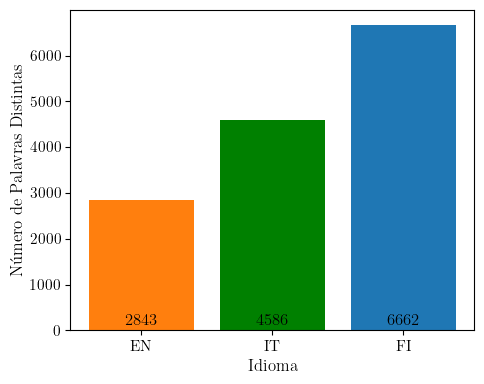

In [26]:
words = ['EN', 'IT', 'FI']
values = [2843, 4586, 6662]

bars = plt.bar(words, values, color=colors_scatter)

plt.xlabel('Idioma')
plt.ylabel('Número de Palavras Distintas')

for bar in bars:
    # Get the x position and the height (value) of the bar
    x = bar.get_x() + bar.get_width() / 2 
    y = bar.get_height()
    plt.text(x, 50, str(y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
#plt.savefig("assets/exact_distinct_words.png")
plt.show()


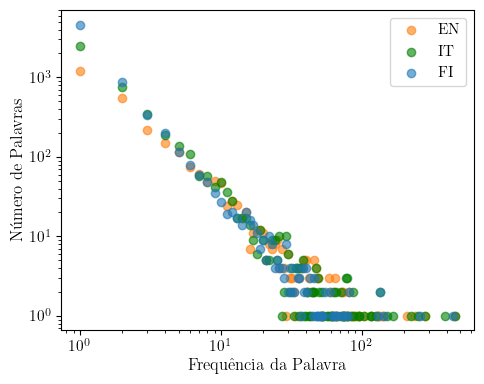

In [27]:
freq_table = exact_results[('EN', 'count')].value_counts().sort_index()
plt.scatter(freq_table.index, freq_table.values, color=colors_scatter[0], alpha=0.6, label='EN')

freq_table = exact_results[('IT', 'count')].value_counts().sort_index()
plt.scatter(freq_table.index, freq_table.values, color=colors_scatter[1], alpha=0.6, label='IT')


freq_table = exact_results[('FI', 'count')].value_counts().sort_index()
plt.scatter(freq_table.index, freq_table.values, color=colors_scatter[2], alpha=0.6, label='FI')

plt.xlabel('Frequência da Palavra')
plt.ylabel('Número de Palavras')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
#plt.savefig('assets/exact_word_freqs.png')
plt.show()

---
---
---

In [28]:
prob_counter = pd.read_excel("results/approximate_counts.xlsx", index_col=0, header=[0,1])
prob_counter.head()

EN                                                                   \
      word_0 count_0     word_1 count_1     word_2 count_2     word_3 count_3   
0  pinocchio   336.0  pinocchio   400.0  pinocchio   448.0  pinocchio   416.0   
1        say   272.0     puppet   304.0     little   320.0     little   224.0   
2       come   224.0        say   208.0        say   256.0        say   224.0   
3     little   192.0         oh   160.0     puppet   208.0       good   192.0   
4     puppet   176.0       good   160.0       come   192.0       like   176.0   

                      ...         FI                                \
      word_4 count_4  ...    word_15 count_15     word_16 count_16   
0  pinocchio   384.0  ...  pinocchio    352.0   pinocchio    544.0   
1     little   304.0  ...      sanoa    256.0       sanoa    304.0   
2     puppet   240.0  ...      tehdä    192.0       saada    224.0   
3        boy   176.0  ...      alkaa    144.0       tehdä    224.0   
4         go   160.0  ...        pää    128.0  marionetti    224.0   

                                                                
      word_17 count_17    word_18 count_18    word_19 count_19  
0   pinocchio    416.0  pinocchio    384.0  pinocchio    560.0  
1       sanoa    224.0      sanoa    352.0      sanoa    272.0  
2       saada    144.0      saada    224.0      tehdä    192.0  
3      huutaa    128.0   geppetto    128.0   geppetto    112.0  
4  marionetti    128.0      alkaa    128.0      saada    112.0  

[5 rows x 120 columns]

In [29]:
def get_approximate_counts(idioma):
    df = prob_counter.xs(key=idioma, level=0, axis=1)

    # Reshape the DataFrame: Stack word_X and count_X into two columns
    words = df.filter(like='word').stack().reset_index(drop=True)
    counts = df.filter(like='count').stack().reset_index(drop=True)

    # Combine into a final DataFrame
    result = pd.DataFrame({'word': words, 'count': counts})


    result = result.groupby('word')['count'].agg(['min', 'mean', 'max']).reset_index()
    result.sort_values('mean', ascending=False, inplace=True)
    result.reset_index(drop=True, inplace=True)
    result['min'] = result['min'].map(int)
    result['mean'] = result['mean'].map(int)
    result['max'] = result['max'].map(int)
    return result

#latex_table(get_approximate_counts('EN').iloc[:10])
#latex_table(get_approximate_counts('IT').iloc[:10])
#latex_table(get_approximate_counts('FI').iloc[:10])

#resultados = exact_results.copy()
#resultados = resultados.xs(key="FI", level=0, axis=1)
#resultados.set_index('word', inplace=True)

#resultados.loc["olla"]

---
---
---

In [30]:
ss10_count = pd.read_excel('results/SS10_counts.xlsx', index_col=0, header=[0,1])

#latex_table(ss10_count.loc[:, ss10_count.columns.get_level_values(0).isin(['EN', 'FI'])])

In [31]:
ss70_count = pd.read_excel('results/SS70_counts.xlsx', index_col=0, header=[0,1]).iloc[:10]

#latex_table(ss70_count)

In [32]:
sspc_count = pd.read_excel('results/SSpc_counts.xlsx', index_col=0, header=[0,1]).iloc[:10]

sspc_count[('EN', 'count')] = sspc_count[('EN', 'count')].map(int)
sspc_count[('IT', 'count')] = sspc_count[('IT', 'count')].map(int)
sspc_count[('FI', 'count')] = sspc_count[('FI', 'count')].map(int)

#latex_table(sspc_count)

In [33]:
ss150_count = pd.read_excel('results/SS150_counts.xlsx', index_col=0, header=[0,1]).iloc[:10]

#latex_table(ss150_count)